# Prediksi Penyakit Jantung Menggunakan Model Pembelajaran Mesin pada Dataset Cleveland

## Pendahuluan

Penyakit jantung adalah salah satu penyebab kematian utama di seluruh dunia dan mencakup berbagai kondisi yang memengaruhi fungsi jantung. Kondisi ini dapat meliputi penyempitan pembuluh darah koroner, gangguan irama jantung, hingga kegagalan jantung. Deteksi dini penyakit jantung sangat penting untuk mencegah komplikasi serius seperti serangan jantung dan stroke. Berbagai pemeriksaan medis digunakan untuk menilai kesehatan jantung, termasuk pengukuran tekanan darah, kadar kolesterol, serta tes elektrokardiogram (EKG) yang merekam aktivitas listrik jantung.

Dalam konteks diagnosis, sejumlah parameter klinis dan hasil pemeriksaan tersebut dianalisis untuk menentukan ada tidaknya penyakit jantung serta tingkat keparahannya. Informasi ini sangat penting bagi dokter dalam menentukan langkah pengobatan yang tepat dan memberikan perawatan preventif bagi pasien yang berisiko tinggi. Dataset Heart Disease yang digunakan dalam penelitian ini berisi data pasien dengan berbagai fitur medis yang membantu dalam melakukan klasifikasi apakah pasien memiliki penyakit jantung atau tidak, sehingga dapat mendukung sistem pendukung keputusan medis.

## Data Understanding

### Sumber Data

Dataset diambil dari link berikut:

https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset Heart Disease (Cleveland) berasal dari Cleveland Clinic Foundation, yang dikumpulkan oleh David Aha pada tahun 1987. Data ini kemudian dipublikasikan melalui UCI Machine Learning Repository, yang dikelola oleh University of California, Irvine (UCI), sebagai bagian dari koleksi dataset untuk penelitian dan eksperimen pembelajaran mesin.

### Tujuan

Tujuan dari dataset Heart Disease (Cleveland) adalah untuk mengembangkan dan menguji model pembelajaran mesin yang dapat memprediksi ada tidaknya penyakit jantung pada seorang pasien berdasarkan data medis dan klinis.

### Integrasi Data

Dataset Heart Disease (Cleveland) tersedia secara publik di UCI Machine Learning Repository dan dapat diakses untuk keperluan penelitian dan pengembangan model pembelajaran mesin. Untuk mengambil data ini menggunakan Python, kita bisa memanfaatkan pustaka seperti ucimlrepo yang memudahkan pengunduhan dan integrasi dataset dari UCI secara langsung ke lingkungan pemrograman. Setelah data diimpor, kita dapat memuatnya sebagai DataFrame menggunakan pandas, sehingga data siap untuk proses eksplorasi, pembersihan, dan pelatihan model.




In [44]:
pip install ucimlrepo

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

### Penjelasan fitur

Dataset Heart Disease (Cleveland) berisi 14 fitur klinis dan demografis yang digunakan untuk membantu prediksi ada tidaknya penyakit jantung pada pasien. Fitur pertama adalah age, yang menunjukkan usia pasien dalam tahun. Kemudian sex merepresentasikan jenis kelamin pasien dengan nilai 1 untuk pria dan 0 untuk wanita. Fitur cp (chest pain type) mengklasifikasikan jenis nyeri dada yang dialami pasien, yang penting untuk diagnosis klinis. trestbps adalah tekanan darah sistolik saat istirahat, sementara chol mencerminkan kadar kolesterol serum pasien dalam mg/dl. Fitur fbs (fasting blood sugar) menunjukkan apakah gula darah puasa pasien lebih besar dari 120 mg/dl, yang merupakan indikator risiko diabetes. Hasil pemeriksaan elektrokardiogram saat istirahat dicatat dalam restecg, yang mengidentifikasi kelainan jantung. thalach adalah detak jantung maksimum yang dicapai pasien selama tes latihan. exang menunjukkan apakah pasien mengalami angina yang dipicu oleh olahraga. Fitur oldpeak mengukur depresi segmen ST yang diamati selama tes latihan relatif terhadap istirahat, yang merupakan indikator stres jantung. slope menggambarkan kemiringan segmen ST selama latihan, yang membantu menilai risiko. Fitur ca mencatat jumlah pembuluh darah utama yang terlihat tersumbat berdasarkan fluoroskopi. Terakhir, thal adalah hasil tes thallium, yang mengindikasikan abnormalitas jantung seperti cacat permanen atau reversibel. Target variabel num menunjukkan keberadaan penyakit jantung dengan nilai 0 berarti tidak ada penyakit dan nilai 1 sampai 4 menunjukkan adanya penyakit dengan tingkat keparahan berbeda.

In [46]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset Heart Disease
heart_disease = fetch_ucirepo(id=45)

# Ambil fitur dan target
X = heart_disease.data.features
y = heart_disease.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# Simpan ke CSV
df.to_csv('heart-disease.csv', index=False)

# Tampilkan metadata fitur dalam tabel (DataFrame)
feature_info = pd.DataFrame(heart_disease.variables).set_index('name')
print("Informasi fitur:")
print(feature_info[['type', 'description']])

# Tampilkan 5 data teratas
print("\n5 data teratas:")
print(df.head())


Informasi fitur:
                 type                                        description
name                                                                    
age           Integer                                               None
sex       Categorical                                               None
cp        Categorical                                               None
trestbps      Integer  resting blood pressure (on admission to the ho...
chol          Integer                                  serum cholestoral
fbs       Categorical                    fasting blood sugar > 120 mg/dl
restecg   Categorical                                               None
thalach       Integer                        maximum heart rate achieved
exang     Categorical                            exercise induced angina
oldpeak       Integer  ST depression induced by exercise relative to ...
slope     Categorical                                               None
ca            Integer  number of m

### Eksplorasi Data

In [47]:
# Cek missing value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# Cek tipe data
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Statistik deskriptif (cek sebaran, deteksi outlier kasar)
print("\nStatistik deskriptif:")
print(df.describe())

# Deteksi outlier (nilai ekstrem) via IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    return outliers.sum()

print("\nJumlah outlier per fitur numerik (berdasarkan IQR):")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    print(f"{col}: {detect_outliers_iqr(df[col])} outlier")



Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Tipe data setiap kolom:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Statistik deskriptif:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.

### Visualisasi Data

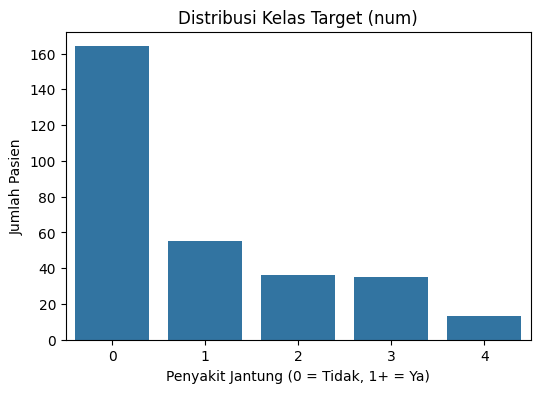

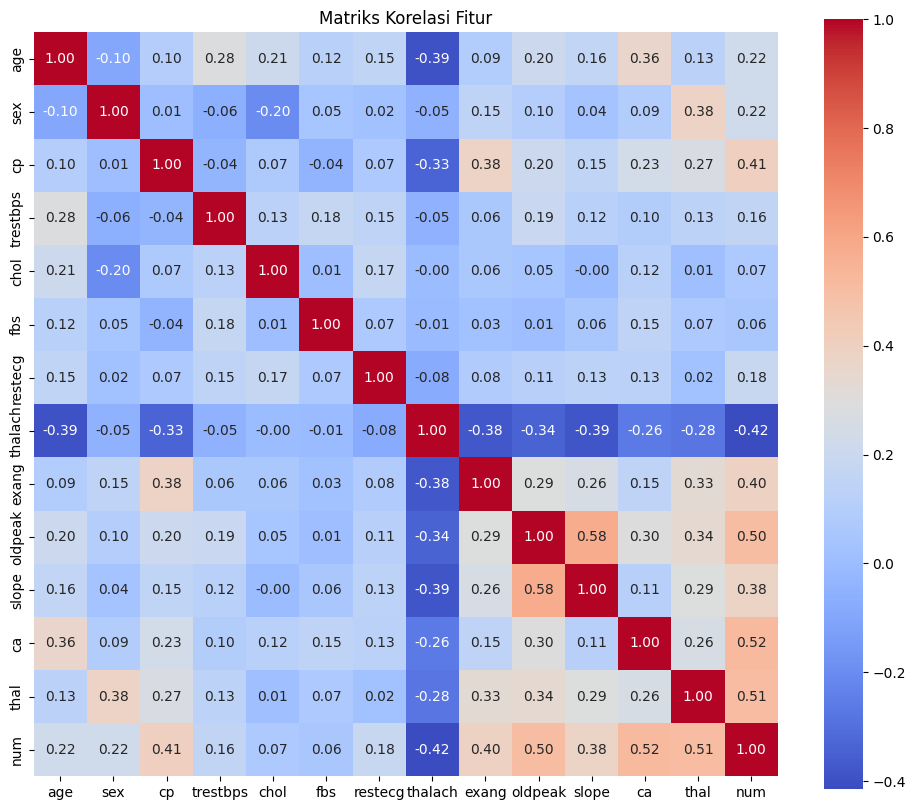

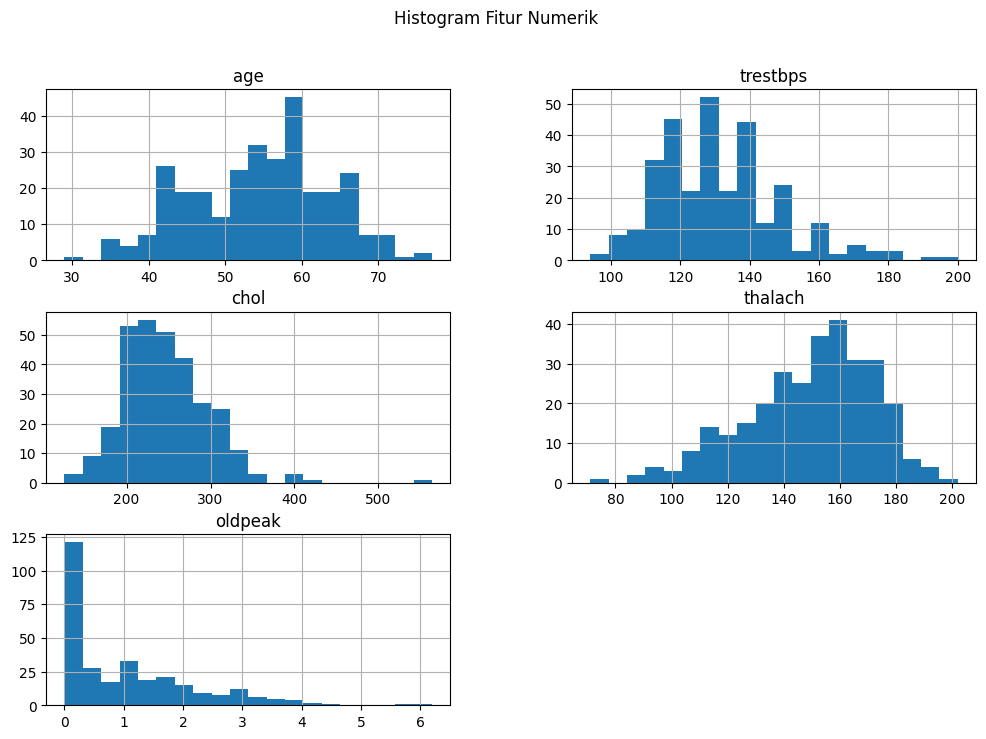

In [48]:
# Visualisasi distribusi target 'num' (penyakit jantung)
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title('Distribusi Kelas Target (num)')
plt.xlabel('Penyakit Jantung (0 = Tidak, 1+ = Ya)')
plt.ylabel('Jumlah Pasien')
plt.show()

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

# Histogram beberapa fitur numerik
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(bins=20, figsize=(12,8))
plt.suptitle('Histogram Fitur Numerik')
plt.show()

## Preprocessing

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Imputasi missing value dengan rata-rata
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 2. Normalisasi fitur numerik
numerical_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns.drop('target')
scaler = StandardScaler()
df_imputed[numerical_cols] = scaler.fit_transform(df_imputed[numerical_cols])

# 3. (Opsional) Binning usia
df_imputed['age_bin'] = pd.cut(df_imputed['age'], bins=[0, 40, 60, 100], labels=['muda', 'dewasa', 'lanjut'])

# Cek hasil akhir
print("\nHasil preprocessing:")
print(df_imputed.head())


KeyError: "['target'] not found in axis"

## Klasifikasi pada Data

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.iloc[:, 0].apply(lambda x: 1 if x > 0 else 0)  # Binerisasi target

# Imputasi missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalisasi fitur numerik
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Model klasifikasi yang akan diuji
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Fungsi pelatihan dan evaluasi model
def train_evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Akurasi: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Jalankan klasifikasi untuk semua model
for name, model in models.items():
    train_evaluate_model(name, model)


## Evaluasi Model

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features

# Imputasi nilai kosong
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method untuk menentukan jumlah cluster k terbaik
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Jumlah cluster k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method untuk Menentukan k')
plt.show()

# Silhouette Score untuk menentukan k terbaik
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil)

plt.plot(k_range, sil_scores, 'go-')
plt.xlabel('Jumlah cluster k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan k')
plt.show()
